BST test. Обзор данных. Постановка задачи - в файле ```BST_Задача_Моделирование_вкладов.docx```

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df_in = pd.read_excel('../data/BST_DataSet.xlsx', parse_dates=True)
df_in.shape

(84, 12)

84 наблюдения, 12 признаков.

In [3]:
print(df_in.columns)

Index(['Unnamed: 0', 'Прирост вкладов физических лиц в рублях (млн руб)',
       'Доходность ОФЗ по сроку до 1 года', 'Ключевая ставка',
       'Ставка по вкладам в долларах до 1 года',
       'Ставка по вкладам в рублях до 1 года', 'Нефть марки Юралс, долл./барр',
       'Индекс потребительских цен, ед.', 'М0, руб', 'М2, руб',
       'Курс доллара к рублю, руб', 'Номинальная средняя з/п, руб'],
      dtype='object')


Сохраним в csv на случай ad-hoc изменений (чтобы не пришлось устанавливать офисный пакет)

In [4]:
df_in = df_in.rename({'Unnamed: 0':'date', 'Прирост вкладов физических лиц в рублях (млн руб)':'delta', 
                   'Доходность ОФЗ по сроку до 1 года':'ofz_below_1y', 'Ключевая ставка':'k_rate',
                   'Ставка по вкладам в долларах до 1 года':'usd_below_1y', 'Ставка по вкладам в рублях до 1 года':'rur_below_1y',
                   'Нефть марки Юралс, долл./барр':'urals_price', 'Индекс потребительских цен, ед.':'buyer_prices_index',
                   'М0, руб':'m0', 'М2, руб':'m2', 'Курс доллара к рублю, руб':'usd_to_rur', 
                   'Номинальная средняя з/п, руб':'avg_payment'
                  }, axis = 1)

Собственно, они не заставили себя ждать. Одна из колонок не хочет переименовываться. Поменяем в блокноте.

In [5]:
df_in.to_csv('../data/BST_DataSet.csv', encoding='utf-8')

In [6]:
del(df_in)

К нашему сожалению, заказчик предоставляет только ```train```-выборку, остальные данные нужно добыть. 

- Данные по цене нефти Urals удалось найти только за последние полгода, остальные взяты из новостей про среднюю цену. 
- Данные индикаторов M0, M2 существуют (источник: ЦБ РФ), однако они не похожи на предоставленные заказчиком в проверочной выборке.
- Данные по обменному курсу доллара, вероятно, взяты заказчиком и нами из различных источников.

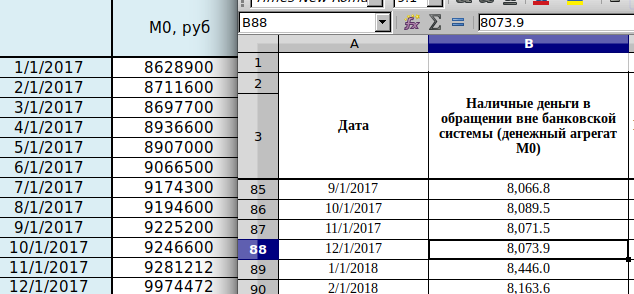

In [7]:
from IPython.display import Image
Image("../data/m0.png")

Прежде чем приступить к моделированию, бегло изучим статистики временного ряда.

In [8]:
df = pd.read_csv('../data/BST_DataSet.csv', encoding='utf-8')

In [9]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.index = df.date
del(df['date'])

In [10]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [11]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])


        plt.tight_layout()
    return 

Критерий Дики-Фуллера: p=0.000011


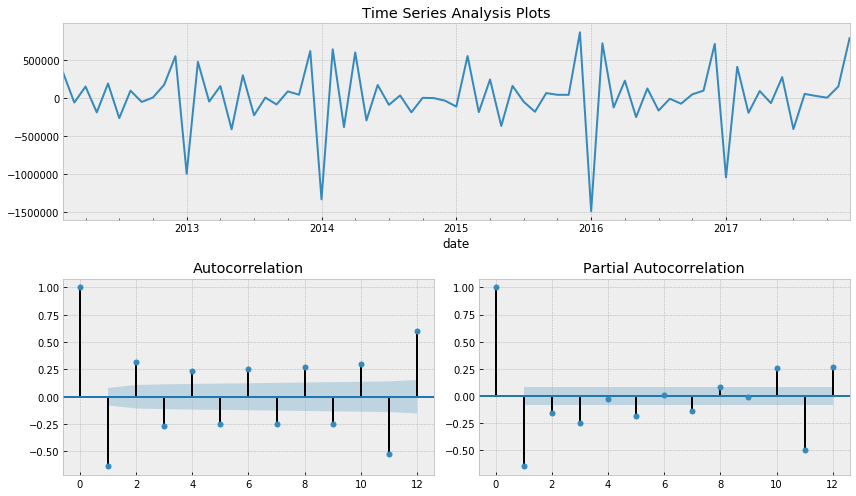

In [12]:
df['delta_season_shift'] = df.delta - df.delta.shift(1)
tsplot(df.delta_season_shift[12+1:], lags=12)

Моделированию посвящён отдельный ноутбук ```data-analysis.ipynb```. Обратимся далее к нему.